# Q1)
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage 

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [18]:
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [19]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [20]:
airline.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

# hierarchica clustering

- normalizing data

In [21]:
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(airline)
norm_airline.shape

(3999, 12)

- now we apply euclidian diastance and linkages

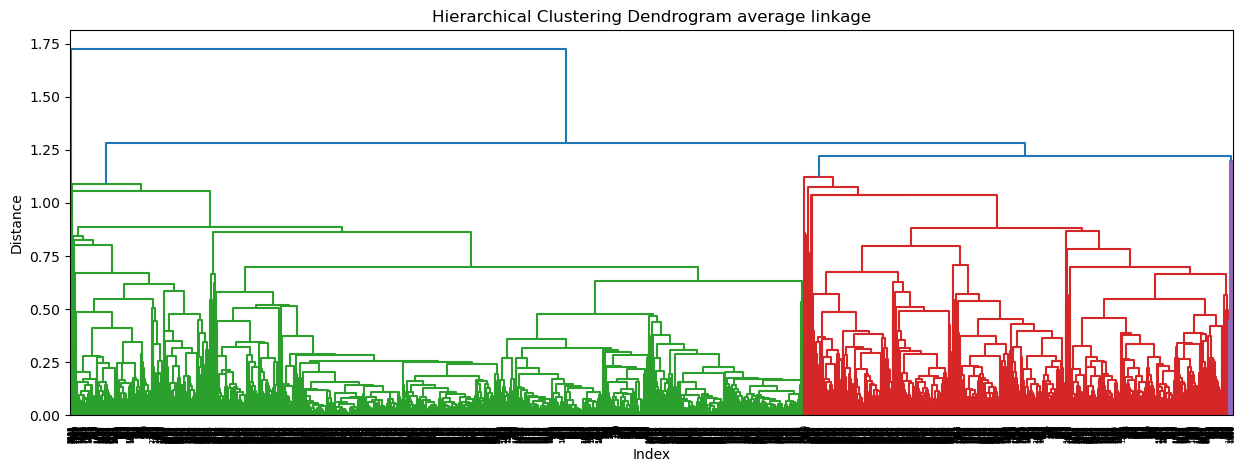

In [42]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(norm_airline, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show()     

In [51]:
# # creating a  new column and assigning it to new column 
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(norm_airline) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels 
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      2  
1          0      2  
2          0      2  
3          0      2  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      2  
3998       0      2  

[3999 rows x 13 columns]

In [39]:
 #which data falls under cluster 0
cluster_0 = [(airline.clust==0)]
cluster_0

[0       False
 1       False
 2       False
 3       False
 4        True
         ...  
 3994     True
 3995     True
 3996     True
 3997    False
 3998    False
 Name: clust, Length: 3999, dtype: bool]

In [31]:
airline.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?        clust  
count      3999.000000         3999.00000  3999.000000  3999.000000  
mean          1.373593         4118.55939     0.370343     1.269317  
std           3.793172         2065.13454     0.482957     0.968868  
min           0.000000            2.00000     0.000000     0.000000  
25%           0.000000         2330.00000     0.000000     0.000000  
50%           0.000000         4096.00000     0.000000     2.000000  
75%           1.000000         5790.50000     1.000000     2.000000  
max          53.000000         8296.00000     1.000000     4.000000

In [50]:
cluster_1 = [(airline.clust==1)]
cluster_1

[0        True
 1        True
 2        True
 3        True
 4       False
         ...  
 3994    False
 3995    False
 3996    False
 3997     True
 3998     True
 Name: clust, Length: 3999, dtype: bool]

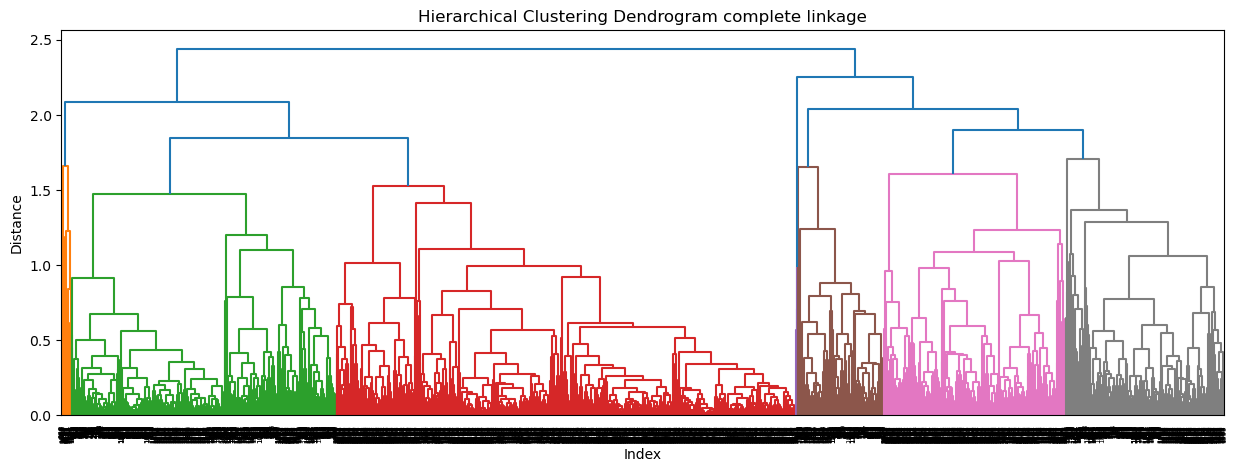

In [43]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(norm_airline, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show()     

In [47]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(norm_airline) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels 
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      1  
3998       0      1  

[3999 rows x 13 columns]

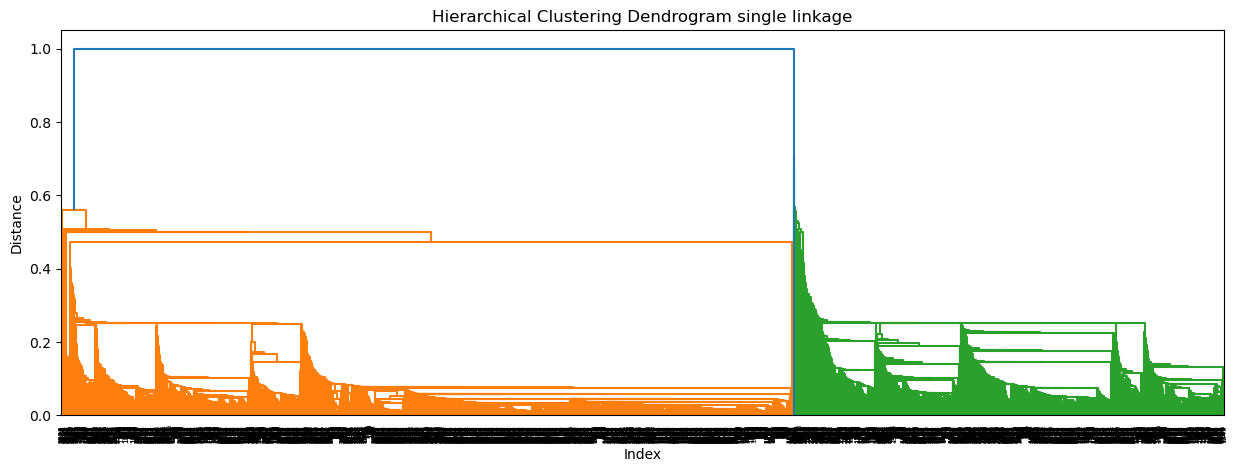

In [44]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(norm_airline, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show()  

In [55]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(norm_airline) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels 
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      1  
3998       0      1  

[3999 rows x 13 columns]

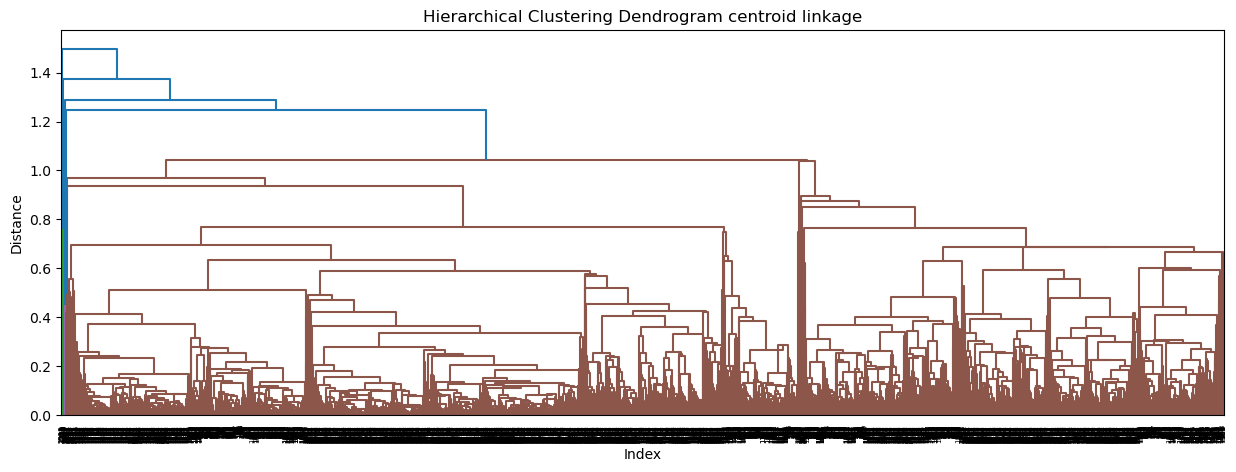

In [45]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(norm_airline, method="centroid",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram centroid linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show()  

In [56]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(norm_airline) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels 
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      1  
1          0      1  
2          0      1  
3          0      1  
4          1      0  
...      ...    ...  
3994       1      0  
3995       1      0  
3996       1      0  
3997       0      1  
3998       0      1  

[3999 rows x 13 columns]

# K means clustering

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
airline=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x) 

In [6]:
airline_norm = norm_func(airline.iloc[:,1:])  
airline_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

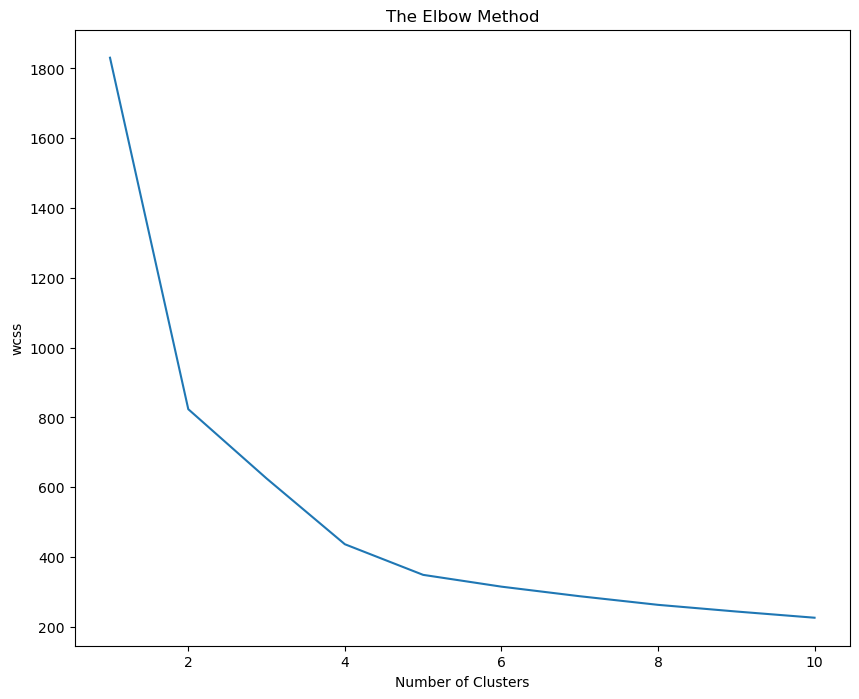

In [14]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(airline_norm)
    wcss.append(clf.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.ylabel('wcss')
plt.xlabel('Number of Clusters')
plt.show()  

In [15]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(airline_norm)  

In [16]:
y_kmeans
clf.labels_ 

array([4, 4, 4, ..., 2, 3, 3])

In [17]:
clf.cluster_centers_ 

array([[ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -2.22044605e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -4.44089210e-16],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [18]:
clf.inertia_

348.9433217254137

In [19]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
airline['clust']=md # creating a  new column and assigning it to new column 
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      4  
1          0      4  
2          0      4  
3          0      4  
4          1      2  
...      ...    ...  
3994       1      1  
3995       1      1  
3996       1      2  
3997       0      3  
3998       0      3  

[3999 rows x 13 columns]

In [21]:
airline.iloc[:,1:14].groupby(airline.clust).mean() 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
clust                                                               
0      118297.325243   73.467638   3.584142   1.001618   1.022654   
1       83529.153046  290.453195   1.156018   1.032689   1.008915   
2      108317.387376  198.336634   3.915842   1.001238   1.025990   
3       33097.301357   94.131783   1.070736   1.016473   1.006783   
4       49921.633641   89.903226   1.122120   1.019585   1.001152   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
clust                                                                  
0      31384.393204    17.233010         224.100324         0.627832   
1       8850.395245    10.476969        1030.112927         3.148588   
2      45609.657178    20.201733         713.728960         2.142327   
3       3244.520349     6.173450         212.850775         0.603682   
4       3467.074885     6.913594         243.834101         0.728111   

       Days_since_enroll  Award?  clust  
clust                                    
0            4419.553398     0.0    0.0  
1            4338.867756     1.0    1.0  
2            4863.439356     1.0    2.0  
3            1992.402132     0.0    3.0  
4            5567.925115     0.0    4.0

# DB SCAN

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  clust  
0          0      4  
1          0      4  
2          0      4  
3          0      4  
4          1      2  
...      ...    ...  
3994       1      1  
3995       1      1  
3996       1      2  
3997       0      3  
3998       0      3  

[3999 rows x 13 columns]

In [26]:
stscaler = StandardScaler().fit(airline) #standardizing data into z scores
X = stscaler.transform(airline)  #converting them into arrays
X   

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.30665759e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.30665759e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.30665759e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.57223542e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  5.74717023e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  5.74717023e-01]])

In [27]:
dbscan = DBSCAN(eps=0.475, min_samples=14)#min samples >= D+1
dbscan.fit(X)  

DBSCAN(eps=0.475, min_samples=14)

In [28]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([ 0,  0,  0, ..., -1,  5,  5], dtype=int64)

In [96]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   
cl

cluster
0           0
1           0
2           0
3           0
4          -1
5           0
6          -1
7           1
8          -1
9          -1
10         -1
11         -1
12         -1
13          0
14          0
15         -1
16         -1
17          1
18         -1
19         -1
20         -1
21         -1
22         -1
23          0
24         -1
25          0
26         -1
27          0
28         -1
29         -1
30         -1
31          0
32         -1
33          0
34          0
35         -1
36         -1
37         -1
38         -1
39          1
40          0
41         -1
42         -1
43         -1
44         -1
45         -1
46         -1
47          1
48         -1
49         -1
50         -1
51          0
52         -1
53         -1
54          0
55          0
56         -1
57         -1
58         -1
59         -1
60          3
61         -1
62          0
63         -1
64          0
65         -1
66          0
67         -1
68         -1
69          2
70         -1
71         -1
72         -1
73         -1
74         -1
75         -1
76         -1
77         -1
78         -1
79         -1
80         -1
81         -1
82          0
83          0
84          0
85         -1
86          1
87         -1
88         -1
89          1
90         -1
91         -1
92         -1
93         -1
94         -1
95          0
96         -1
97         -1
98          0
99          2
100        -1
101         1
102         0
103        -1
104         0
105        -1
106        -1
107         1
108        -1
109        -1
110        -1
111        -1
112        -1
113        -1
114        -1
115        -1
116        -1
117        -1
118        -1
119        -1
120         0
121        -1
122        -1
123        -1
124        -1
125        -1
126        -1
127        -1
128        -1
129        -1
130         1
131         1
132        -1
133        -1
134        -1
135        -1
136        -1
137        -1
138        -1
139         0
140         0
141         0
142         0
143         4
144         3
145        -1
146         0
147        -1
148         3
149         0
150        -1
151        -1
152        -1
153         0
154        -1
155        -1
156        -1
157         2
158        -1
159         0
160         3
161        -1
162        -1
163        -1
164         2
165         0
166        -1
167        -1
168        -1
169        -1
170        -1
171         0
172        -1
173        -1
174        -1
175        -1
176        -1
177        -1
178         1
179        -1
180        -1
181        -1
182         0
183        -1
184         3
185         3
186        -1
187        -1
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         1
195        -1
196        -1
197        -1
198        -1
199        -1
200        -1
201        -1
202         0
203        -1
204         0
205         0
206        -1
207        -1
208         2
209         0
210        -1
211         0
212        -1
213         2
214        -1
215        -1
216         0
217         0
218        -1
219         4
220        -1
221        -1
222        -1
223         0
224        -1
225        -1
226        -1
227        -1
228        -1
229        -1
230        -1
231        -1
232         0
233        -1
234        -1
235        -1
236         0
237        -1
238        -1
239         0
240        -1
241        -1
242        -1
243        -1
244        -1
245        -1
246        -1
247        -1
248        -1
249        -1
250         0
251        -1
252        -1
253         2
254        -1
255        -1
256        -1
257        -1
258        -1
259        -1
260        -1
261         0
262        -1
263        -1
264        -1
265        -1
266         0
267         0
268        -1
269        -1
270        -1
271        -1
272        -1
273        -1
274         0
275        -1
276         0
277        -1
278         0
279        -1
280        -1
281        -1
282        -1
283        -1
284        -1
28

In [35]:
airline1 = pd.concat([airline,cl],axis=1)  
airline1    

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [37]:
dl=dbscan.labels_
import sklearn #finding silhouette score
sklearn.metrics.silhouette_score(X, dl) 

-0.13360544693191242

In [38]:
# observe the silhouette score is closer to zero which means overlapping clusters
# the ideal silhouette score is close to zero which can be acheived by experimenting with different epsilon values

- k distance graph

In [39]:
from sklearn.neighbors import NearestNeighbors  

In [98]:
neigh = NearestNeighbors(n_neighbors=22) 
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

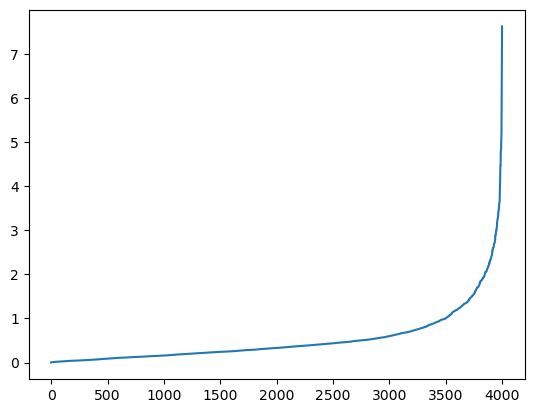

In [41]:
distances = np.sort(distances, axis=0) #sort all the distances in ascending order
distances = distances[:,1]
plt.plot(distances)  

# Q2
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage 

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [48]:
crime1=pd.read_csv('crime_data.csv')
crime1

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [52]:
crime1.columns 

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [53]:
crime = crime1.drop(['Unnamed: 0'],axis=1)   

In [54]:
crime

Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        62  16.5
27    12.2      252        81  46.0
28     2.1       57        56   9.5
29     7.4      159        89  18.8
30    11.4      285        70  32.1
31    11.1      254        86  26.1
32    13.0      337        45  16.1
33     0.8       45        44   7.3
34     7.3      120        75  21.4
35     6.6      151        68  20.0
36     4.9      159        67  29.3
37     6.3      106        72  14.9
38     3.4      174        87   8.3
39    14.4      279        48  22.5
40     3.8       86        45  12.8
41    13.2      188        59  26.9
42    12.7      201        80  25.5
43     3.2      120        80  22.9
44     2.2       48        32  11.2
45     8.5      156        63  20.7
46     4.0      145        73  26.2
47     5.7       81        39   9.3
48     2.6       53        66  10.8
49     6.8      161        60  15.6

In [55]:
crime.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [56]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


# hierarchica clustering

In [57]:
minmax = MinMaxScaler()
norm_crime = minmax.fit_transform(crime)
norm_crime.shape

(50, 4)

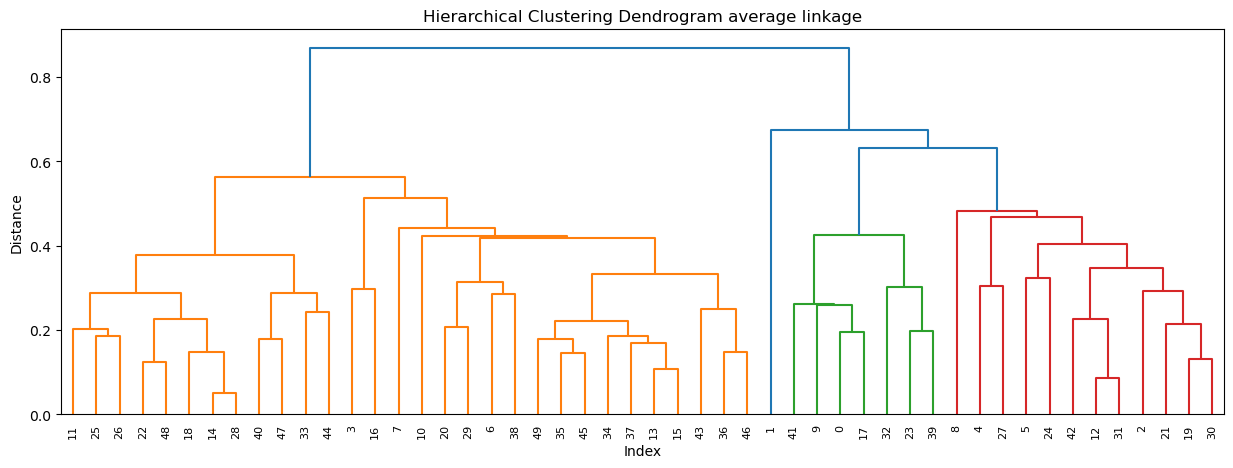

In [58]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(norm_crime, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show() 

In [59]:
 # creating a  new column and assigning it to new column 
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(norm_crime) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels 
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      3
1     10.0      263        48  44.5      2
2      8.1      294        80  31.0      1
3      8.8      190        50  19.5      0
4      9.0      276        91  40.6      1
5      7.9      204        78  38.7      1
6      3.3      110        77  11.1      0
7      5.9      238        72  15.8      0
8     15.4      335        80  31.9      1
9     17.4      211        60  25.8      3
10     5.3       46        83  20.2      0
11     2.6      120        54  14.2      0
12    10.4      249        83  24.0      1
13     7.2      113        65  21.0      0
14     2.2       56        57  11.3      0
15     6.0      115        66  18.0      0
16     9.7      109        52  16.3      0
17    15.4      249        66  22.2      3
18     2.1       83        51   7.8      0
19    11.3      300        67  27.8      1
20     4.4      149        85  16.3      0
21    12.1      255        74  35.1      1
22     2.7       72        66  14.9      0
23    16.1      259        44  17.1      3
24     9.0      178        70  28.2      1
25     6.0      109        53  16.4      0
26     4.3      102        62  16.5      0
27    12.2      252        81  46.0      1
28     2.1       57        56   9.5      0
29     7.4      159        89  18.8      0
30    11.4      285        70  32.1      1
31    11.1      254        86  26.1      1
32    13.0      337        45  16.1      3
33     0.8       45        44   7.3      0
34     7.3      120        75  21.4      0
35     6.6      151        68  20.0      0
36     4.9      159        67  29.3      0
37     6.3      106        72  14.9      0
38     3.4      174        87   8.3      0
39    14.4      279        48  22.5      3
40     3.8       86        45  12.8      0
41    13.2      188        59  26.9      3
42    12.7      201        80  25.5      1
43     3.2      120        80  22.9      0
44     2.2       48        32  11.2      0
45     8.5      156        63  20.7      0
46     4.0      145        73  26.2      0
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      0
49     6.8      161        60  15.6      0

In [60]:
cluster_0 = [(crime.clust==0)]
cluster_0

[0     False
 1     False
 2     False
 3      True
 4     False
 5     False
 6      True
 7      True
 8     False
 9     False
 10     True
 11     True
 12    False
 13     True
 14     True
 15     True
 16     True
 17    False
 18     True
 19    False
 20     True
 21    False
 22     True
 23    False
 24    False
 25     True
 26     True
 27    False
 28     True
 29     True
 30    False
 31    False
 32    False
 33     True
 34     True
 35     True
 36     True
 37     True
 38     True
 39    False
 40     True
 41    False
 42    False
 43     True
 44     True
 45     True
 46     True
 47     True
 48     True
 49     True
 Name: clust, dtype: bool]

In [61]:
cluster_1 = [(crime.clust==1)]
cluster_1

[0     False
 1     False
 2      True
 3     False
 4      True
 5      True
 6     False
 7     False
 8      True
 9     False
 10    False
 11    False
 12     True
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19     True
 20    False
 21     True
 22    False
 23    False
 24     True
 25    False
 26    False
 27     True
 28    False
 29    False
 30     True
 31     True
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42     True
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 Name: clust, dtype: bool]

In [62]:
cluster_2 = [(crime.clust==2)]
cluster_2

[0     False
 1      True
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40    False
 41    False
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 Name: clust, dtype: bool]

In [63]:
cluster_3 = [(crime.clust==3)]
cluster_3

[0      True
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9      True
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17     True
 18    False
 19    False
 20    False
 21    False
 22    False
 23     True
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32     True
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39     True
 40    False
 41     True
 42    False
 43    False
 44    False
 45    False
 46    False
 47    False
 48    False
 49    False
 Name: clust, dtype: bool]

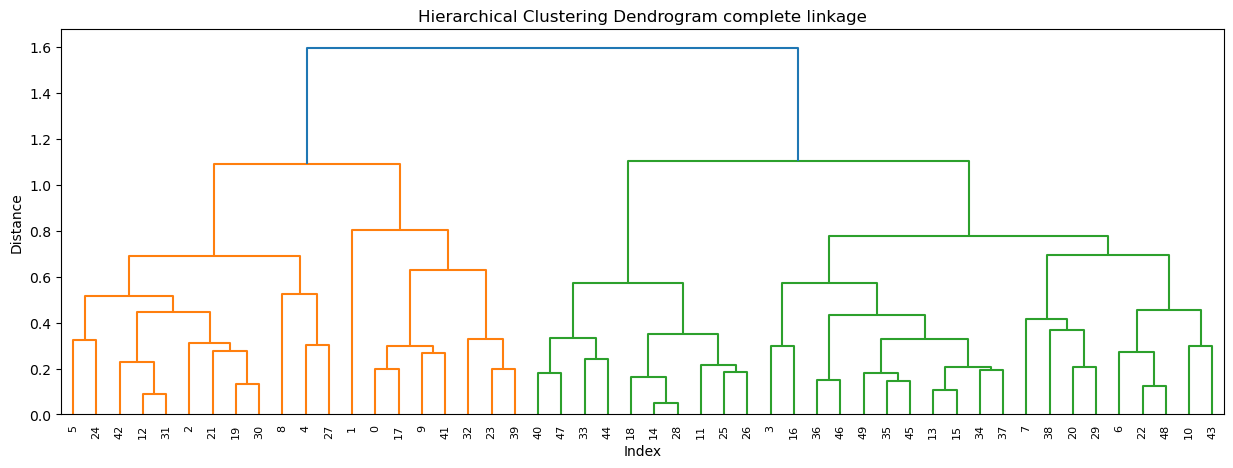

In [64]:
z = linkage(norm_crime, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show() 

In [65]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(norm_crime) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels 
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      0
1     10.0      263        48  44.5      0
2      8.1      294        80  31.0      3
3      8.8      190        50  19.5      1
4      9.0      276        91  40.6      3
5      7.9      204        78  38.7      3
6      3.3      110        77  11.1      1
7      5.9      238        72  15.8      1
8     15.4      335        80  31.9      3
9     17.4      211        60  25.8      0
10     5.3       46        83  20.2      1
11     2.6      120        54  14.2      2
12    10.4      249        83  24.0      3
13     7.2      113        65  21.0      1
14     2.2       56        57  11.3      2
15     6.0      115        66  18.0      1
16     9.7      109        52  16.3      1
17    15.4      249        66  22.2      0
18     2.1       83        51   7.8      2
19    11.3      300        67  27.8      3
20     4.4      149        85  16.3      1
21    12.1      255        74  35.1      3
22     2.7       72        66  14.9      1
23    16.1      259        44  17.1      0
24     9.0      178        70  28.2      3
25     6.0      109        53  16.4      2
26     4.3      102        62  16.5      2
27    12.2      252        81  46.0      3
28     2.1       57        56   9.5      2
29     7.4      159        89  18.8      1
30    11.4      285        70  32.1      3
31    11.1      254        86  26.1      3
32    13.0      337        45  16.1      0
33     0.8       45        44   7.3      2
34     7.3      120        75  21.4      1
35     6.6      151        68  20.0      1
36     4.9      159        67  29.3      1
37     6.3      106        72  14.9      1
38     3.4      174        87   8.3      1
39    14.4      279        48  22.5      0
40     3.8       86        45  12.8      2
41    13.2      188        59  26.9      0
42    12.7      201        80  25.5      3
43     3.2      120        80  22.9      1
44     2.2       48        32  11.2      2
45     8.5      156        63  20.7      1
46     4.0      145        73  26.2      1
47     5.7       81        39   9.3      2
48     2.6       53        66  10.8      1
49     6.8      161        60  15.6      1

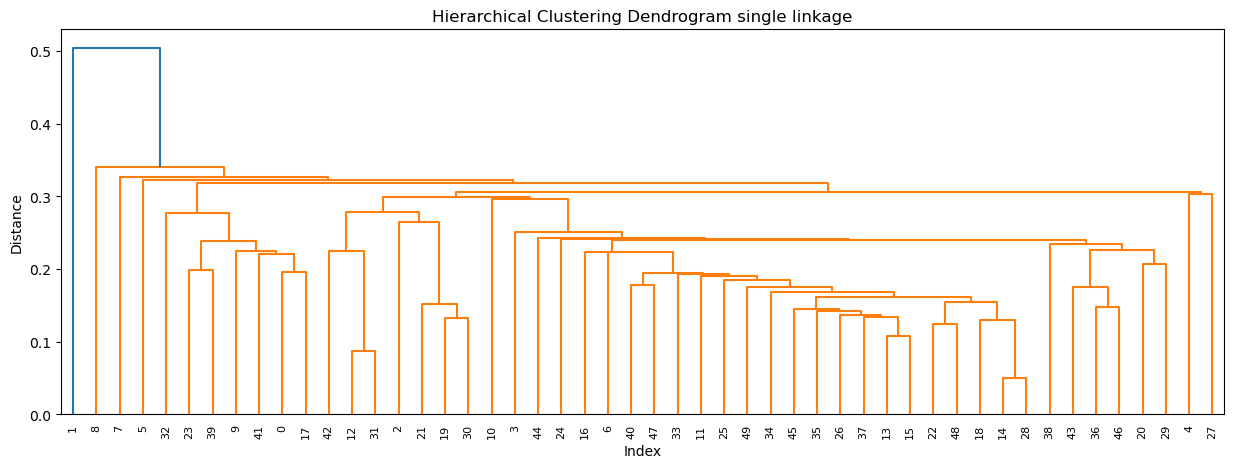

In [66]:
z = linkage(norm_crime, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show() 

In [67]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage='single',affinity = "euclidean").fit(norm_crime) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels 
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      0
1     10.0      263        48  44.5      3
2      8.1      294        80  31.0      0
3      8.8      190        50  19.5      0
4      9.0      276        91  40.6      0
5      7.9      204        78  38.7      0
6      3.3      110        77  11.1      0
7      5.9      238        72  15.8      1
8     15.4      335        80  31.9      2
9     17.4      211        60  25.8      0
10     5.3       46        83  20.2      0
11     2.6      120        54  14.2      0
12    10.4      249        83  24.0      0
13     7.2      113        65  21.0      0
14     2.2       56        57  11.3      0
15     6.0      115        66  18.0      0
16     9.7      109        52  16.3      0
17    15.4      249        66  22.2      0
18     2.1       83        51   7.8      0
19    11.3      300        67  27.8      0
20     4.4      149        85  16.3      0
21    12.1      255        74  35.1      0
22     2.7       72        66  14.9      0
23    16.1      259        44  17.1      0
24     9.0      178        70  28.2      0
25     6.0      109        53  16.4      0
26     4.3      102        62  16.5      0
27    12.2      252        81  46.0      0
28     2.1       57        56   9.5      0
29     7.4      159        89  18.8      0
30    11.4      285        70  32.1      0
31    11.1      254        86  26.1      0
32    13.0      337        45  16.1      0
33     0.8       45        44   7.3      0
34     7.3      120        75  21.4      0
35     6.6      151        68  20.0      0
36     4.9      159        67  29.3      0
37     6.3      106        72  14.9      0
38     3.4      174        87   8.3      0
39    14.4      279        48  22.5      0
40     3.8       86        45  12.8      0
41    13.2      188        59  26.9      0
42    12.7      201        80  25.5      0
43     3.2      120        80  22.9      0
44     2.2       48        32  11.2      0
45     8.5      156        63  20.7      0
46     4.0      145        73  26.2      0
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      0
49     6.8      161        60  15.6      0

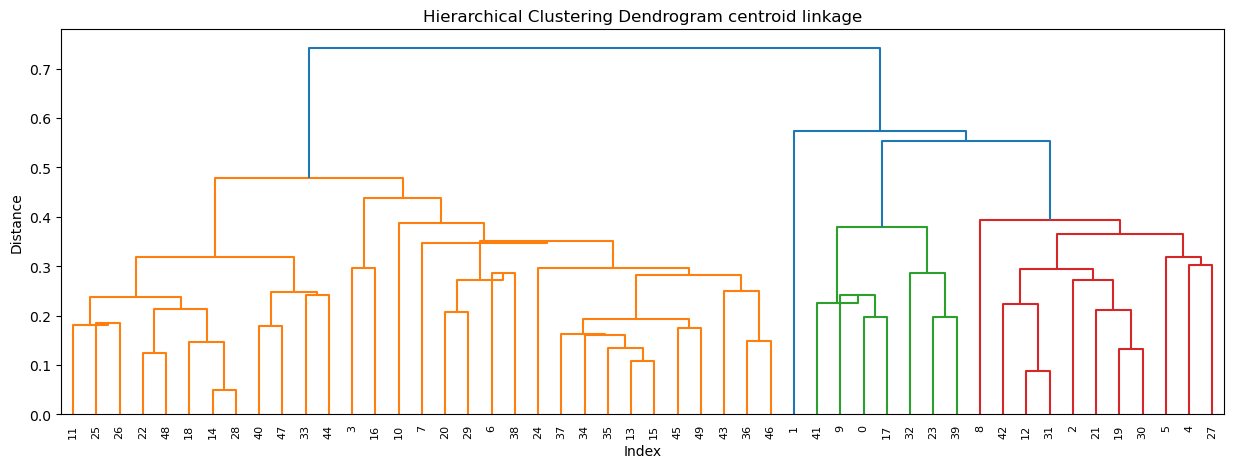

In [68]:
z = linkage(norm_crime, method="centroid",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram centroid linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,

)
plt.show() 

# K means clustering

In [69]:
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      0
1     10.0      263        48  44.5      3
2      8.1      294        80  31.0      0
3      8.8      190        50  19.5      0
4      9.0      276        91  40.6      0
5      7.9      204        78  38.7      0
6      3.3      110        77  11.1      0
7      5.9      238        72  15.8      1
8     15.4      335        80  31.9      2
9     17.4      211        60  25.8      0
10     5.3       46        83  20.2      0
11     2.6      120        54  14.2      0
12    10.4      249        83  24.0      0
13     7.2      113        65  21.0      0
14     2.2       56        57  11.3      0
15     6.0      115        66  18.0      0
16     9.7      109        52  16.3      0
17    15.4      249        66  22.2      0
18     2.1       83        51   7.8      0
19    11.3      300        67  27.8      0
20     4.4      149        85  16.3      0
21    12.1      255        74  35.1      0
22     2.7       72        66  14.9      0
23    16.1      259        44  17.1      0
24     9.0      178        70  28.2      0
25     6.0      109        53  16.4      0
26     4.3      102        62  16.5      0
27    12.2      252        81  46.0      0
28     2.1       57        56   9.5      0
29     7.4      159        89  18.8      0
30    11.4      285        70  32.1      0
31    11.1      254        86  26.1      0
32    13.0      337        45  16.1      0
33     0.8       45        44   7.3      0
34     7.3      120        75  21.4      0
35     6.6      151        68  20.0      0
36     4.9      159        67  29.3      0
37     6.3      106        72  14.9      0
38     3.4      174        87   8.3      0
39    14.4      279        48  22.5      0
40     3.8       86        45  12.8      0
41    13.2      188        59  26.9      0
42    12.7      201        80  25.5      0
43     3.2      120        80  22.9      0
44     2.2       48        32  11.2      0
45     8.5      156        63  20.7      0
46     4.0      145        73  26.2      0
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      0
49     6.8      161        60  15.6      0

In [70]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x) 

In [71]:
crime_norm = norm_func(crime.iloc[:,1:])  
crime_norm

Assault  UrbanPop      Rape     clust
0   0.654110  0.440678  0.359173  0.000000
1   0.746575  0.271186  0.961240  1.000000
2   0.852740  0.813559  0.612403  0.000000
3   0.496575  0.305085  0.315245  0.000000
4   0.791096  1.000000  0.860465  0.000000
5   0.544521  0.779661  0.811370  0.000000
6   0.222603  0.762712  0.098191  0.000000
7   0.660959  0.677966  0.219638  0.333333
8   0.993151  0.813559  0.635659  0.666667
9   0.568493  0.474576  0.478036  0.000000
10  0.003425  0.864407  0.333333  0.000000
11  0.256849  0.372881  0.178295  0.000000
12  0.698630  0.864407  0.431525  0.000000
13  0.232877  0.559322  0.354005  0.000000
14  0.037671  0.423729  0.103359  0.000000
15  0.239726  0.576271  0.276486  0.000000
16  0.219178  0.338983  0.232558  0.000000
17  0.698630  0.576271  0.385013  0.000000
18  0.130137  0.322034  0.012920  0.000000
19  0.873288  0.593220  0.529716  0.000000
20  0.356164  0.898305  0.232558  0.000000
21  0.719178  0.711864  0.718346  0.000000
22  0.092466  0.576271  0.196382  0.000000
23  0.732877  0.203390  0.253230  0.000000
24  0.455479  0.644068  0.540052  0.000000
25  0.219178  0.355932  0.235142  0.000000
26  0.195205  0.508475  0.237726  0.000000
27  0.708904  0.830508  1.000000  0.000000
28  0.041096  0.406780  0.056848  0.000000
29  0.390411  0.966102  0.297158  0.000000
30  0.821918  0.644068  0.640827  0.000000
31  0.715753  0.915254  0.485788  0.000000
32  1.000000  0.220339  0.227390  0.000000
33  0.000000  0.203390  0.000000  0.000000
34  0.256849  0.728814  0.364341  0.000000
35  0.363014  0.610169  0.328165  0.000000
36  0.390411  0.593220  0.568475  0.000000
37  0.208904  0.677966  0.196382  0.000000
38  0.441781  0.932203  0.025840  0.000000
39  0.801370  0.271186  0.392765  0.000000
40  0.140411  0.220339  0.142119  0.000000
41  0.489726  0.457627  0.506460  0.000000
42  0.534247  0.813559  0.470284  0.000000
43  0.256849  0.813559  0.403101  0.000000
44  0.010274  0.000000  0.100775  0.000000
45  0.380137  0.525424  0.346253  0.000000
46  0.342466  0.694915  0.488372  0.000000
47  0.123288  0.118644  0.051680  0.000000
48  0.027397  0.576271  0.090439  0.000000
49  0.397260  0.474576  0.214470  0.000000

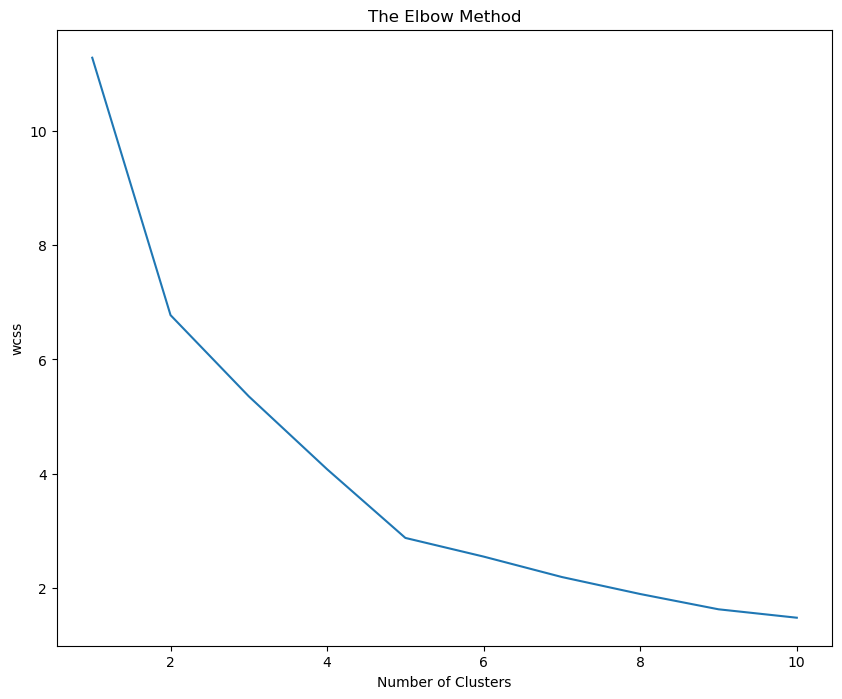

In [81]:
from sklearn.cluster import KMeans
fig=plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(crime_norm)
    wcss.append(clf.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.ylabel('wcss')
plt.xlabel('Number of Clusters')
plt.show()  

In [75]:
clf = KMeans(n_clusters=8)
y_kmeans = clf.fit_predict(crime_norm) 

In [76]:
y_kmeans
clf.labels_ 

array([4, 3, 1, 4, 1, 1, 2, 5, 6, 5, 2, 7, 1, 7, 7, 7, 7, 5, 0, 1, 2, 1,
       7, 4, 5, 7, 7, 1, 0, 2, 1, 1, 4, 0, 2, 5, 5, 2, 2, 4, 0, 5, 5, 2,
       0, 5, 5, 0, 7, 7])

In [77]:
clf.cluster_centers_ 

array([[ 7.42009132e-02,  2.11864407e-01,  6.07235142e-02,
         0.00000000e+00],
       [ 7.47336377e-01,  7.94726930e-01,  6.76715475e-01,
         6.93889390e-18],
       [ 2.67123288e-01,  8.30508475e-01,  2.43863049e-01,
         0.00000000e+00],
       [ 7.46575342e-01,  2.71186441e-01,  9.61240310e-01,
         1.00000000e+00],
       [ 7.36986301e-01,  2.88135593e-01,  3.09560724e-01,
        -6.93889390e-18],
       [ 4.88356164e-01,  6.06779661e-01,  4.33074935e-01,
         3.33333333e-02],
       [ 9.93150685e-01,  8.13559322e-01,  6.35658915e-01,
         6.66666667e-01],
       [ 1.91780822e-01,  4.76271186e-01,  2.11886305e-01,
         0.00000000e+00]])

In [78]:
clf.inertia_

1.8574460178136034

In [79]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      4
1     10.0      263        48  44.5      3
2      8.1      294        80  31.0      1
3      8.8      190        50  19.5      4
4      9.0      276        91  40.6      1
5      7.9      204        78  38.7      1
6      3.3      110        77  11.1      2
7      5.9      238        72  15.8      5
8     15.4      335        80  31.9      6
9     17.4      211        60  25.8      5
10     5.3       46        83  20.2      2
11     2.6      120        54  14.2      7
12    10.4      249        83  24.0      1
13     7.2      113        65  21.0      7
14     2.2       56        57  11.3      7
15     6.0      115        66  18.0      7
16     9.7      109        52  16.3      7
17    15.4      249        66  22.2      5
18     2.1       83        51   7.8      0
19    11.3      300        67  27.8      1
20     4.4      149        85  16.3      2
21    12.1      255        74  35.1      1
22     2.7       72        66  14.9      7
23    16.1      259        44  17.1      4
24     9.0      178        70  28.2      5
25     6.0      109        53  16.4      7
26     4.3      102        62  16.5      7
27    12.2      252        81  46.0      1
28     2.1       57        56   9.5      0
29     7.4      159        89  18.8      2
30    11.4      285        70  32.1      1
31    11.1      254        86  26.1      1
32    13.0      337        45  16.1      4
33     0.8       45        44   7.3      0
34     7.3      120        75  21.4      2
35     6.6      151        68  20.0      5
36     4.9      159        67  29.3      5
37     6.3      106        72  14.9      2
38     3.4      174        87   8.3      2
39    14.4      279        48  22.5      4
40     3.8       86        45  12.8      0
41    13.2      188        59  26.9      5
42    12.7      201        80  25.5      5
43     3.2      120        80  22.9      2
44     2.2       48        32  11.2      0
45     8.5      156        63  20.7      5
46     4.0      145        73  26.2      5
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      7
49     6.8      161        60  15.6      7

In [82]:
crime.iloc[:,1:14].groupby(crime.clust).mean() 

Assault   UrbanPop       Rape  clust
clust                                         
0       66.666667  44.500000   9.650000    0.0
1      263.222222  78.888889  33.488889    1.0
2      123.000000  81.000000  16.737500    2.0
3      263.000000  48.000000  44.500000    3.0
4      260.200000  49.000000  19.280000    4.0
5      187.600000  67.800000  24.060000    5.0
6      335.000000  80.000000  31.900000    6.0
7      101.000000  60.100000  15.500000    7.0

# DB scan

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
crime

Murder  Assault  UrbanPop  Rape  clust
0     13.2      236        58  21.2      4
1     10.0      263        48  44.5      3
2      8.1      294        80  31.0      1
3      8.8      190        50  19.5      4
4      9.0      276        91  40.6      1
5      7.9      204        78  38.7      1
6      3.3      110        77  11.1      2
7      5.9      238        72  15.8      5
8     15.4      335        80  31.9      6
9     17.4      211        60  25.8      5
10     5.3       46        83  20.2      2
11     2.6      120        54  14.2      7
12    10.4      249        83  24.0      1
13     7.2      113        65  21.0      7
14     2.2       56        57  11.3      7
15     6.0      115        66  18.0      7
16     9.7      109        52  16.3      7
17    15.4      249        66  22.2      5
18     2.1       83        51   7.8      0
19    11.3      300        67  27.8      1
20     4.4      149        85  16.3      2
21    12.1      255        74  35.1      1
22     2.7       72        66  14.9      7
23    16.1      259        44  17.1      4
24     9.0      178        70  28.2      5
25     6.0      109        53  16.4      7
26     4.3      102        62  16.5      7
27    12.2      252        81  46.0      1
28     2.1       57        56   9.5      0
29     7.4      159        89  18.8      2
30    11.4      285        70  32.1      1
31    11.1      254        86  26.1      1
32    13.0      337        45  16.1      4
33     0.8       45        44   7.3      0
34     7.3      120        75  21.4      2
35     6.6      151        68  20.0      5
36     4.9      159        67  29.3      5
37     6.3      106        72  14.9      2
38     3.4      174        87   8.3      2
39    14.4      279        48  22.5      4
40     3.8       86        45  12.8      0
41    13.2      188        59  26.9      5
42    12.7      201        80  25.5      5
43     3.2      120        80  22.9      2
44     2.2       48        32  11.2      0
45     8.5      156        63  20.7      5
46     4.0      145        73  26.2      5
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      7
49     6.8      161        60  15.6      7

In [86]:
stscaler = StandardScaler().fit(airline) #standardizing data into z scores
X = stscaler.transform(airline)  #converting them into arrays
X   

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  1.30665759e+00],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  1.30665759e+00],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  1.30665759e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.57223542e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  5.74717023e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  5.74717023e-01]])

In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=8)#min samples >= D+1
dbscan.fit(X)  

DBSCAN(min_samples=8)

In [88]:
dbscan.labels_ 

array([ 0,  0,  0, ..., -1, 12, 12], dtype=int64)

In [91]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])   
cl

cluster
0           0
1           0
2           0
3           0
4          -1
5           0
6          -1
7           1
8          -1
9          -1
10         -1
11         -1
12         -1
13          0
14          0
15         -1
16         -1
17          1
18         -1
19         -1
20         -1
21         -1
22         -1
23          0
24         -1
25          0
26         -1
27          0
28         -1
29         -1
30         -1
31          0
32         -1
33          0
34          0
35         -1
36         -1
37         -1
38         -1
39          1
40          0
41         -1
42         -1
43         -1
44         -1
45         -1
46         -1
47          1
48         -1
49         -1
50         -1
51          0
52         -1
53         -1
54          0
55          0
56         -1
57         -1
58         -1
59         -1
60          3
61         -1
62          0
63         -1
64          0
65         -1
66          0
67         -1
68         -1
69          2
70         -1
71         -1
72         -1
73         -1
74         -1
75         -1
76         -1
77         -1
78         -1
79         -1
80         -1
81         -1
82          0
83          0
84          0
85         -1
86          1
87         -1
88         -1
89          1
90         -1
91         -1
92         -1
93         -1
94         -1
95          0
96         -1
97         -1
98          0
99          2
100        -1
101         1
102         0
103        -1
104         0
105        -1
106        -1
107         1
108        -1
109        -1
110        -1
111        -1
112        -1
113        -1
114        -1
115        -1
116        -1
117        -1
118        -1
119        -1
120         0
121        -1
122        -1
123        -1
124        -1
125        -1
126        -1
127        -1
128        -1
129        -1
130         1
131         1
132        -1
133        -1
134        -1
135        -1
136        -1
137        -1
138        -1
139         0
140         0
141         0
142         0
143         4
144         3
145        -1
146         0
147        -1
148         3
149         0
150        -1
151        -1
152        -1
153         0
154        -1
155        -1
156        -1
157         2
158        -1
159         0
160         3
161        -1
162        -1
163        -1
164         2
165         0
166        -1
167        -1
168        -1
169        -1
170        -1
171         0
172        -1
173        -1
174        -1
175        -1
176        -1
177        -1
178         1
179        -1
180        -1
181        -1
182         0
183        -1
184         3
185         3
186        -1
187        -1
188        -1
189         0
190        -1
191        -1
192        -1
193        -1
194         1
195        -1
196        -1
197        -1
198        -1
199        -1
200        -1
201        -1
202         0
203        -1
204         0
205         0
206        -1
207        -1
208         2
209         0
210        -1
211         0
212        -1
213         2
214        -1
215        -1
216         0
217         0
218        -1
219         4
220        -1
221        -1
222        -1
223         0
224        -1
225        -1
226        -1
227        -1
228        -1
229        -1
230        -1
231        -1
232         0
233        -1
234        -1
235        -1
236         0
237        -1
238        -1
239         0
240        -1
241        -1
242        -1
243        -1
244        -1
245        -1
246        -1
247        -1
248        -1
249        -1
250         0
251        -1
252        -1
253         2
254        -1
255        -1
256        -1
257        -1
258        -1
259        -1
260        -1
261         0
262        -1
263        -1
264        -1
265        -1
266         0
267         0
268        -1
269        -1
270        -1
271        -1
272        -1
273        -1
274         0
275        -1
276         0
277        -1
278         0
279        -1
280        -1
281        -1
282        -1
283        -1
284        -1
28

In [93]:
crime2 = pd.concat([airline,cl],axis=1)  
crime2

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [94]:
dl=dbscan.labels_
import sklearn #finding silhouette score
sklearn.metrics.silhouette_score(X, dl) 

-0.1578827270807777

- k distance graph

In [95]:
from sklearn.neighbors import NearestNeighbors  
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X) 

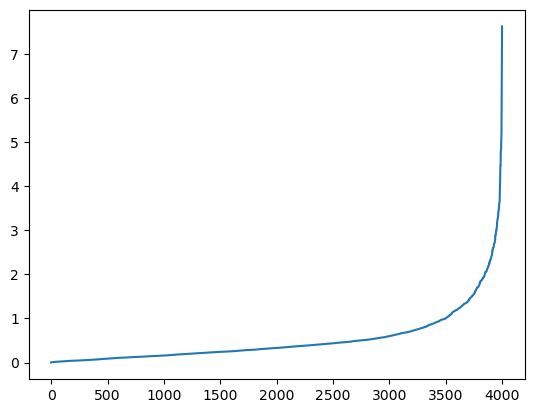

In [97]:
distances = np.sort(distances, axis=0) #sort all the distances in ascending order
distances = distances[:,1]
plt.plot(distances) 